In [1]:
import numpy as np
import pandas as pd
# im
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns

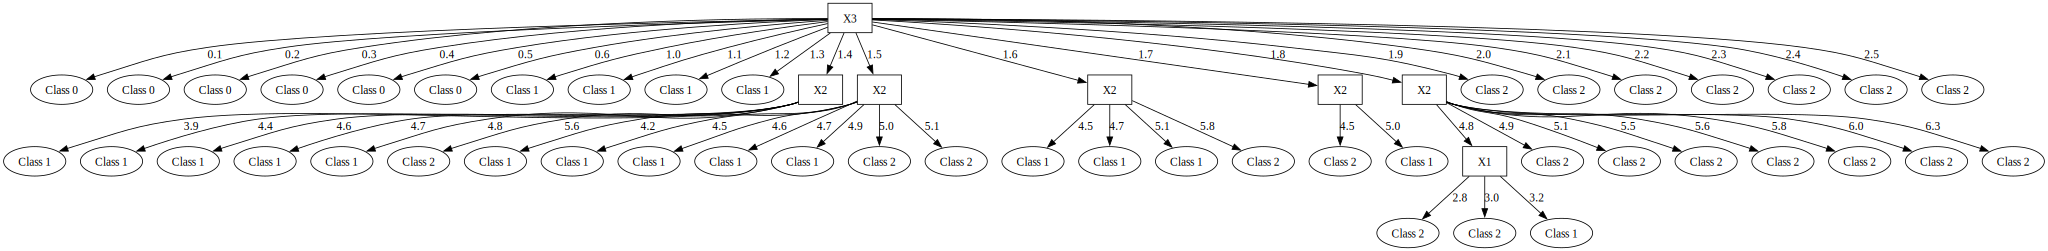

In [348]:
class Node:
    def __init__(self):
        self.feature_index=None
        self.threshold=None
        self.value=None
        self.children=[]
        self.isroot=False
        self.isleaf=False
        self.samples=None
        





def plot_node(root,dot,k,parent,thresholds=None):
    root_id=str(k)
    root_text='X'+str(root.feature_index)
    if thresholds is not None:
        thres=thresholds[root.feature_index][0]
        if thres-int(thres)==0:
            thres=int(thres)
        root_text+=' < '+str(thres)
    dot.node(root_id,root_text,shape='box')  
    k+=1

    # if (k!=0)

    l=len(root.children)
    for i in range(l):
        # dot.node(str(i),'feature')
        child=root.children[i]
        
        
        if child.isleaf:
            text='Class '+str(child.value).strip('[]')
            dot.node(str(k),text,shape='oval')
            node_label=child.threshold
            if thresholds is not None:
                node_label = bool(node_label)
                # print(node_label)
            dot.edge(root_id,str(k),str(node_label))
            k+=1
        else:
            dot,k=plot_node(child,dot,k,root_id)
    if parent is not None:
        node_label=root.threshold
        if thresholds is not None:
            node_label = bool(node_label)
            # print(node_label)
        
        dot.edge(parent,root_id,str(node_label))

    return dot,k


def plot_tree(root,k=0,*,render_flag=False,thresholds=None):
    dot=graphviz.Digraph()
    dot,k=plot_node(root,dot,k,None,thresholds)
    if render_flag==True:
        dot.render('Tree',format='png',cleanup=True,view=True)
    return dot

dot=plot_tree(head)
dot

In [3]:
n=20
X=np.random.randint(0,3,size=(n,3))
y=np.random.randint(0,2,size=(n,1))
# tree=ID3(X,y,verbose=False)
# plot_tree(tree)

In [4]:
def entropy_binary(p,n):
    '''higher entropy means more equal dataset, is from 0 to 1'''
    N=p+n
    p/=N
    n/=N

    return -(p*np.log2(p)+n*np.log2(n))

def entropy_prob(p_array):
    '''higher entropy means more equal dataset, is from 0 to 1'''

    p_=p_array.astype('float64')

    N=np.sum(p_)
    p_/=N
    
    return -np.sum(p_*np.log2(p_))

def entropy(a):
    x,probs=np.unique(a,return_counts=True)
    return entropy_prob(probs)

k=np.array((9,5,2))
entropy(k)


1.584962500721156

In [5]:
x=np.arange(3)

In [6]:
a = np.random.randint(0,5,size=(4,3))
a[:,0:1].shape

def mode(x):
    val,counts=np.unique(x,return_counts=True)
    return val[np.argmax(counts)]


In [8]:
def gain(S,y,*,feature_index):
    '''calculates information gain'''
    A=feature_index
    old_entropy=entropy(y)
    n,m=S.shape
    S_A=S[:,A]
    vals=np.unique(S_A)
    new_entropy=0
    for v in vals:
        yv=y[S_A==v]
        new_entropy+=yv.shape[0]/n*entropy(yv)
    
    return old_entropy-new_entropy

def optimum_feature(X,y,*,features = None, ):
    n,m=X.shape
    
    if features is None:
        features=np.ones(m)
    
    # m=features.shape[0]
    max_feature=None
    max_gain=-1
    # print("Gains follow : ")
    for i in range(m):
        if features[i]==0:
            continue
        gain1=gain(X,y,feature_index=i)
        # print(i, gain1.item())
        if i==0 or max_gain<gain1:
            max_feature=i

    return max_feature

In [9]:
optimum_feature(X,y,features=None)

2

In [115]:
# vals,counts=np.unique(y,return_counts=1)
# if counts.shape[0]==1:
# #     print(counts[0])
# print(counts.shape[0])

y=np.random.randint(0,3,size=(4,1))
# np.concatenate((y,(np.array((44,))[:,np.newaxis])),axis=0)
# np.array((2,))[:,np.newaxis].shape

def get_2d_vector(x):
    return np.array((44,))[:,np.newaxis]

def push_back(x,v):
    return np.concatenate((v,get_2d_vector(x)),axis=0)
    # return v

def push_front(x,v):
    
    if len(v.shape)==1:
        x=np.array((x,))
    elif len(v.shape)==2:
        x=get_2d_vector(x)
    return np.concatenate((x,v),axis=0)
    # return v

k=push_front(y[0],y)
k.T, y.T


(array([[44,  1,  0,  1,  0]]), array([[1, 0, 1, 0]]))

In [106]:
len(np.array((32,)).shape)
len(get_2d_vector(3).shape)

2

In [147]:

# def f(x,r):
#     # return x*x+r
#     return x[0]
# f(y,3)

# gain(y,y,feature_index=0)
# np.where(y<2,)

np.ones((3,1))

array([[1.],
       [1.],
       [1.]])

In [346]:
def discretize(X,y,max_bins,*,inplace=False,verbose=False):
    n,m=X.shape
    X_=X.copy()
    y_=y.copy()
    best_thresholds=np.ones((m,1))
    for i in range(m):
        vals,counts=np.unique(X_[:,i],return_counts=True)
        if counts.shape[0]<=max_bins:
            continue
        ind=np.argsort(X_[:,i])     
        y_=np.take_along_axis(y_,ind,axis=0)        
        X_ = np.take_along_axis(X_, ind[:, np.newaxis], axis=0)        
        y2=push_front(y_[0],y_)
        y3=y_.copy()
        y3-=y2[:-1]
        mask=np.where(y3!=0,True,False)        
        r=X_[:,i:i+1]
        r1=push_front(r[0],r)
        r2=np.where(mask,(r+r1[:-1])/2,-1)
        if verbose:
            print("r2 : ",r2.shape)
        thresholds=np.where(r2!=-1)[0]

        r3=[(gain(np.where(r<c,0,1),y_,feature_index=0)) for c in thresholds]
        best_gain=max(r3)
        if verbose:
            print(thresholds.shape)
            print(len(thresholds))
            print((thresholds))
            best_index=thresholds.index(best_gain)

        best_index=np.argmax(r3)
        best_threshold=thresholds[best_index]
        if verbose:
            print("gain and threshold is ", best_gain, best_threshold)
            print(" min  y  ",min(y_),np.unique(y_))
        r=np.where(r<best_threshold,0,1)
        X_[:,i:i+1]=r        
        best_thresholds[i]=best_thresholds

    if inplace:
        X=X_
        y=y_
    
    return X_,y_,best_thresholds

X=iris.data[:,:]
y=iris.target
X,y,thresholds=discretize(X,y,5)
    

In [225]:
X=iris.data[:,2:]
y=iris.target
r1=X[:,0]<2
r1
r2=X[:,1]<1
r2
r1==r2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

array([[2.],
       [1.]])

X

In [304]:

k=1
X1=[]
y1=[]
f1=[]
f0=2

def ID3(X,y,*,features=None,verbose=False,k=0):
    '''features = -1 to include all features, else pass features array'''
    # global k
    global X1
    global y1

    global f0
    
    


    if verbose:
        pass
        print("\ncalled with step",k)
        
    n,m=X.shape
    if features is None:
        features=np.ones((m,1))
    
    # print("yo me step 2 and ",features.shape)
    if (k==2):
        X1=X
        y1=y
        
        f1=features
        # print(f1)
    else:
        f0=features
    k+=1
    root=Node()
    root.samples=n
    root.isroot=True
    root.isleaf=True

    vals,counts=np.unique(y,return_counts=1)
    if counts.shape[0]==1:
        root.value=y[0]
        if verbose:
            print("single target class left",root.value)
        
        return root
    
    elif np.sum(features)==0:
        root.value=mode(y)
        
        if verbose:
            
            print("Out of features")
        return root

    root.isleaf=False
    feature_index=optimum_feature(X,y,features=features)
    root.feature_index=feature_index
    

    S_A=X[:,feature_index]
    if verbose:
        print("optimum feature is ",feature_index)
    
        print(features.T)
    vals,counts=np.unique(S_A,return_counts=True)
    if counts.shape[0]==1:
        # root.value=y[0]
        if verbose:
            print("single attribute class left",y.T)
            print("classes are : ",np.unique(y,return_counts=True))
            print()

        # child = Node()
        root.isleaf=True
        # root.samples=
        root.value=mode(y)

        return root
    for v in vals:

        mask=(S_A==v)
        yv=y[mask]
        Xv=X[mask]

        if Xv.shape[0]==0:
            # print(v, " : returned early ")
            child = Node()
            child.isleaf=True
            child.samples=0
            child.value=mode(y)
        else:
            features[feature_index]=0
            # print("calling ",features.T)
            # child=ID3(Xv,yv,features=features,k=k)
            # print(v, " : calling featrues " , features.T)
            lis=ID3(Xv,yv,features=features,k=k,verbose=verbose)
            # print("Called")
            if (type(lis)==type((1,))):
                child=lis[0]
            else:
                child=lis
        child.threshold=v
        root.children.append(child)
        
    features[feature_index]=1

    if verbose:
        print('finished iteratiing feature',feature_index)
    return (root,k)
        
        # new_entropy+=yv.shape[0]/n*entropy(yv)
    

head,k=ID3(X,y,features=None,k=0)
        
        
    

In [339]:
def train(X,y,model='ID3',verbose=False,discrete=True,maxbins=None,plotting=False,thresholds=None):
    if discrete==False:
        if maxbins is None:
            maxbins=5
        X,y,thresholds=discretize(X,y,5,verbose=False)
    if model=='ID3':

        tree= ID3(X,y,k=0,verbose=verbose)[0]
        if plotting:
            if discrete : 
                return tree , plot_tree(tree)
            else:
                return tree , plot_tree(tree,thresholds=thresholds)
        return tree

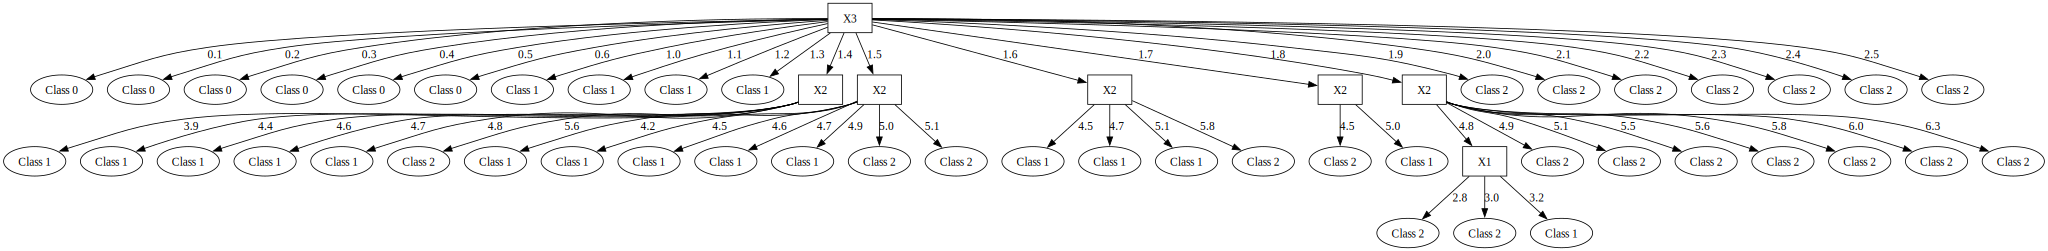

In [356]:
from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data[:,:]
y=iris.target

# without discretizing
tree , plot2=train(X,y,verbose=False,discrete=True,maxbins=5,plotting=True)
plot2


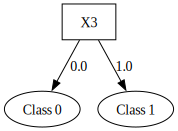

In [374]:
# with discretizing
X=iris.data[:,:]
y=iris.target
MAXBINS=3
X,y,threholds=discretize(X,y,MAXBINS)
tree , plot1=train(X,y,verbose=False,discrete=True,maxbins=MAXBINS
,plotting=True)
plot1

In [254]:
np.unique(y)

array([0, 1, 2])


called with step 0
optimum feature is  3
[[1. 1. 1. 1.]]
0.0  : calling featrues  [[1. 1. 1. 0.]]

called with step 1
single target class left 0
Called
1.0  : calling featrues  [[1. 1. 1. 0.]]

called with step 1
optimum feature is  2
[[1. 1. 1. 0.]]
single attribute class left [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
(array([1, 2]), array([50, 50], dtype=int64))
Called
finished iteratiing feature 3


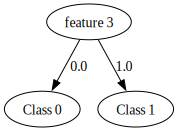

In [383]:
correct=np.count_nonzero(X[:,3]==y)
total=y.shape[0]
# accuracy=np.count_nonzero(X[:,3]==y)/y.shape[0]
accuracy=correct/total
print(correct,"/",total, " correct")
print( "accuracy = ",round(accuracy*100,2), "%")

100 / 150  correct
accuracy =  66.67 %


array([0., 1.])

In [160]:
S=np.array((9,5))
# S=np.array((9,5))


In [161]:
# example

# Create a Digraph object
dot = graphviz.Digraph()

# # Add nodes
dot.node('A', 'Feature 1 <= 5')
dot.node('B', 'Class 0')
dot.node('C', 'Feature 1 > 5')
dot.node('D', 'Feature 2 <= 3')
dot.node('E', 'Class 1')
dot.node('F', 'Class 2')

# # Add edges
dot.edge('A', 'B', label='True')
dot.edge('A', 'C', label='False')
dot.edge('C', 'D', label='True')
dot.edge('C', 'F', label='False')
dot.edge('D', 'E', label='True')
dot.edge('D', 'F', label='False')

# Render the graph
# dot.render('sample_tree', format='png', cleanup=True,view=True)
# graph.render(directory='doctest-output', view=True) #for saving